    Dhushyanth H M
    20191COM0051

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
grad_df = pd.read_csv("Admission_Predict.csv.xls")

In [39]:
grad_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [41]:
grad_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [42]:
grad_df.shape

(500, 9)

Analysis:
- It has 500 rows & 9 columns

**DATA QUALITY CHECK**

*Checking for NULL/MISSING values*

In [43]:
grad_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Details : 
- There are no missing / Null values either in columns or rows

**Duplicate Check**


In [44]:
grad_dub=grad_df.copy()

In [45]:
# Checking for duplicates
# dropping the entire duplicate row if any exist
grad_dub.drop_duplicates(subset=None, inplace=True)

In [46]:
grad_dub.shape

(500, 9)

In [47]:
grad_df.shape

(500, 9)

Analysis:
- The shape remains unaffected after the drop duplicates command. 

- Hence we can conclude that there were zero duplicate values in the dataset.


**Remove unrequired Columns**

In [48]:
# Checking the datatypes before Removing the unwanted Columns.
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [49]:
grad_df.drop('Serial No.',axis=1, inplace=True)

In [50]:
grad_df.shape

(500, 8)

In [51]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**Data Cleaning**

- Checking value_counts() for entire dataframe.

- This will help us to identify any Unknow/Junk/In-valid values present in the dataset.

In [52]:
for col in grad_df:
    print(grad_df[col].value_counts(ascending=False))

312    24
324    23
316    18
321    17
322    17
327    17
314    16
311    16
320    16
317    15
325    15
315    13
308    13
323    13
318    12
319    12
326    12
304    12
300    12
313    12
310    11
305    11
301    11
329    10
307    10
299    10
298    10
309     9
340     9
331     9
328     9
330     8
332     8
334     8
306     7
302     7
297     6
296     5
303     5
336     5
295     5
335     4
333     4
338     4
339     3
337     2
294     2
290     2
293     1
Name: GRE Score, dtype: int64
110    44
105    37
104    29
112    28
107    28
106    28
103    25
102    24
100    24
99     23
111    20
101    20
113    19
109    19
108    19
114    18
116    16
115    11
119    10
98     10
118    10
120     9
117     8
97      7
96      6
95      3
94      2
93      2
92      1
Name: TOEFL Score, dtype: int64
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5  

**Analysis**
- There seems to be no Junk/Unknown values in the entire dataset.

**DATA SPLITTING**

- splitting the data to Train and Test: - We will now split the data into TRAIN and TEST datasets (70% for training and 30% for testing).

- We will use train_test_split method from sklearn package for this

In [53]:
# Check the shape before spliting
grad_df.shape

(500, 8)

In [54]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(grad_df, train_size = 0.70, test_size = 0.30, random_state = 100)

- Verifying the info and shape of the dataframes after split:

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 153 to 8
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          350 non-null    int64  
 1   TOEFL Score        350 non-null    int64  
 2   University Rating  350 non-null    int64  
 3   SOP                350 non-null    float64
 4   LOR                350 non-null    float64
 5   CGPA               350 non-null    float64
 6   Research           350 non-null    int64  
 7   Chance of Admit    350 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 24.6 KB


In [56]:
df_train.shape

(350, 8)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 69 to 311
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          150 non-null    int64  
 1   TOEFL Score        150 non-null    int64  
 2   University Rating  150 non-null    int64  
 3   SOP                150 non-null    float64
 4   LOR                150 non-null    float64
 5   CGPA               150 non-null    float64
 6   Research           150 non-null    int64  
 7   Chance of Admit    150 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 10.5 KB


In [58]:
df_test.shape

(150, 8)

**EXPLORATORY DATA ANALYSIS**

- We need to perform the EXPLORATORY DATA ANALYSIS on TRAINING (df_train) Dataset.

**Visualising Numeric Variables**
- We represent pairplot of all the numeric variables.

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 153 to 8
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          350 non-null    int64  
 1   TOEFL Score        350 non-null    int64  
 2   University Rating  350 non-null    int64  
 3   SOP                350 non-null    float64
 4   LOR                350 non-null    float64
 5   CGPA               350 non-null    float64
 6   Research           350 non-null    int64  
 7   Chance of Admit    350 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 24.6 KB


In [60]:
df_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

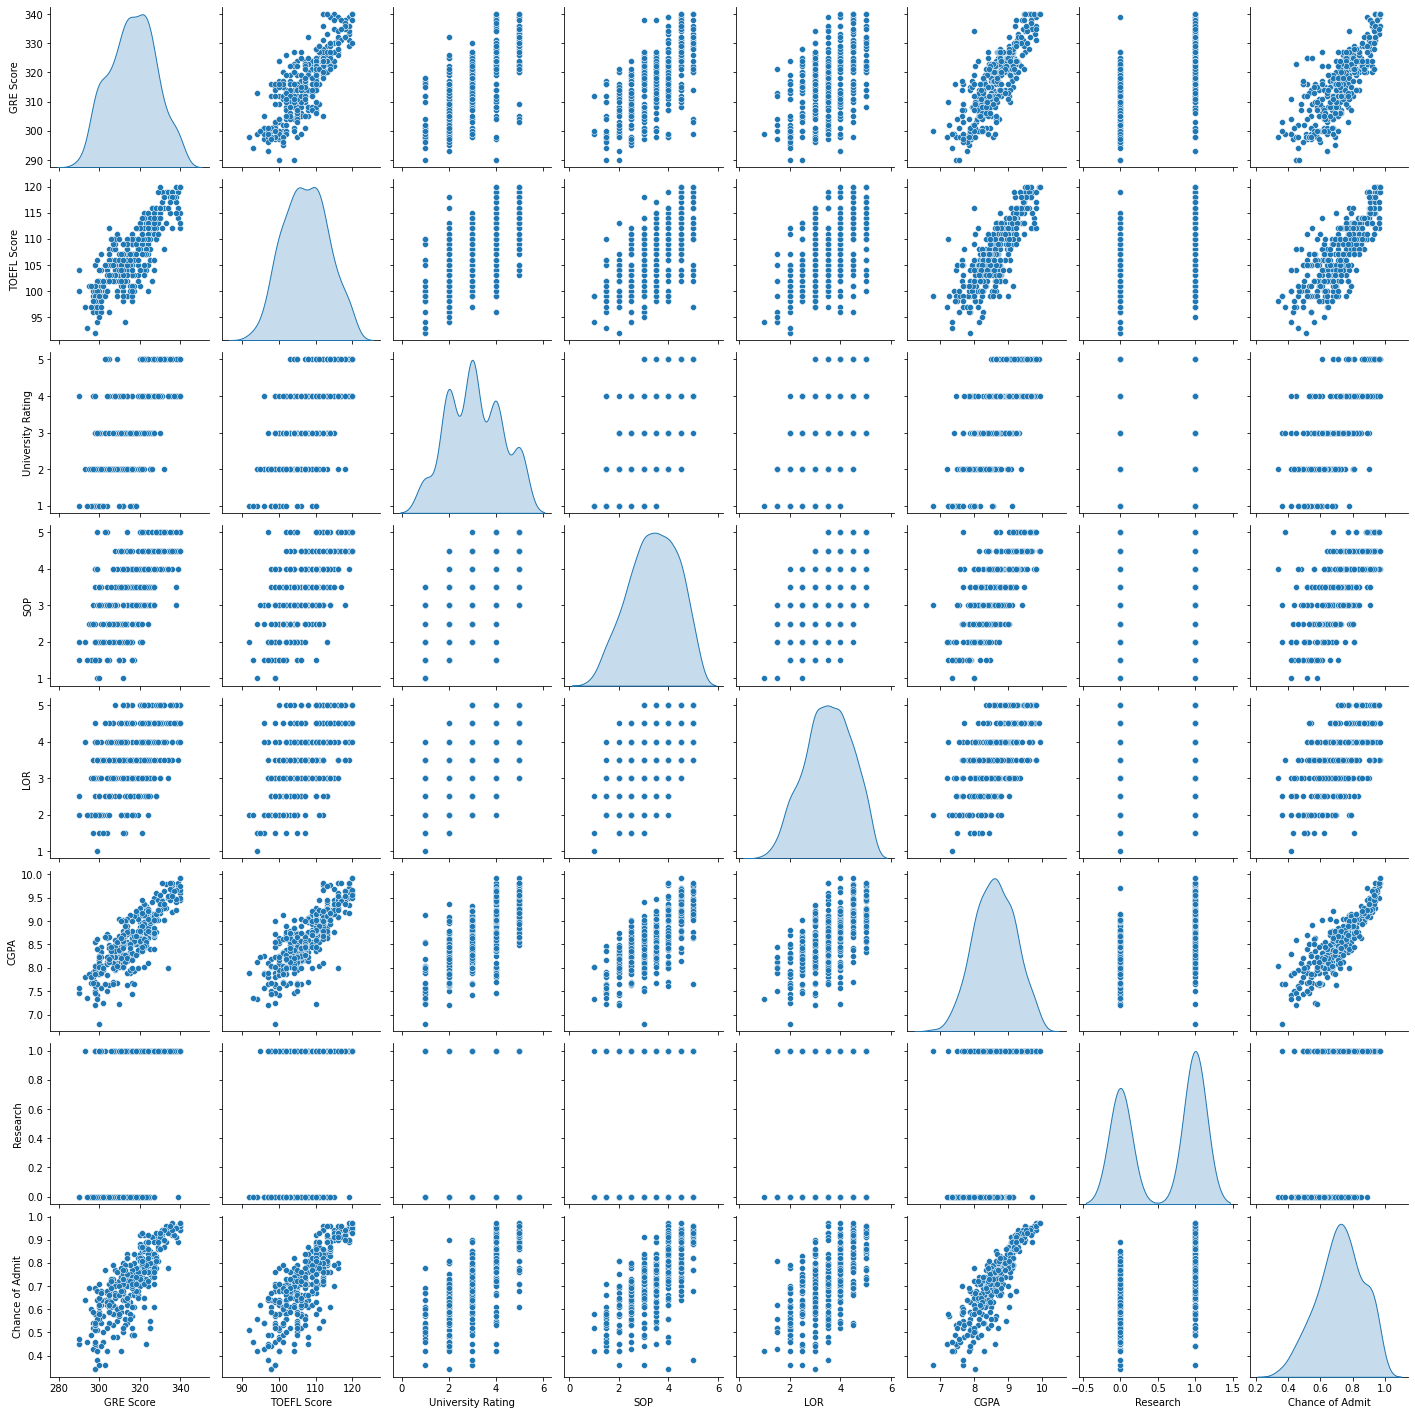

In [61]:
# Creating a new dataframe of only numeric variables:

grad_num=df_train[[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research', 'Chance of Admit']]

sns.pairplot(grad_num, diag_kind='kde')
plt.show()

Analysis:

-The above Pair-Plot tells us that there is a LINEAR RELATION between ''GRE Score', 'TOEFL Score', 'CGPA' &  'Chance of Admit '

**Correlation Matrix**

*Let's check the correlation coefficients to see which variables are highly correlated.*

Note: Here we are considering only those variables (dataframe: grad) that were chosen for analysis

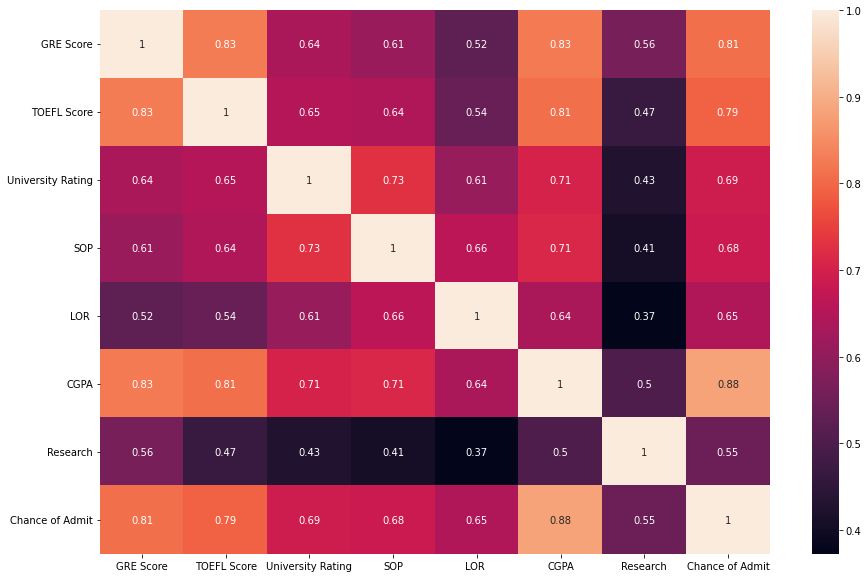

In [62]:
plt.figure(figsize = (15,10))
sns.heatmap(grad_df.corr(), annot = True)
plt.show() # Heat map

Analysis:

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.



**RESCALING THE FEATURES**

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler= MinMaxScaler()

In [65]:
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
153,324,105,3,3.0,4.0,8.75,0,0.79
84,340,115,5,4.5,4.5,9.45,1,0.94
310,320,104,3,3.0,3.5,8.74,1,0.76
494,301,99,3,2.5,2.0,8.45,1,0.68
126,323,113,3,4.0,3.0,9.32,1,0.85


In [66]:
df_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [67]:
# Applying scaler() to all the numeric variables

num_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Chance of Admit']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [68]:
# Checking values after scaling them
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
153,0.68,0.464286,0.5,0.500,0.750,0.625000,0,0.714286
84,1.00,0.821429,1.0,0.875,0.875,0.849359,1,0.952381
310,0.60,0.428571,0.5,0.500,0.625,0.621795,1,0.666667
494,0.22,0.250000,0.5,0.375,0.250,0.528846,1,0.539683
126,0.66,0.750000,0.5,0.750,0.500,0.807692,1,0.809524


In [69]:
df_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.530286,0.546224,0.526429,0.597500,0.626071,0.577509,0.568571,0.607029
std,0.225705,0.214275,0.283592,0.241813,0.225617,0.188555,0.495985,0.222051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.500000,0.439904,0.000000,0.460317
50%,0.520000,0.535714,0.500000,0.625000,0.625000,0.583333,1.000000,0.603175
75%,0.680000,0.714286,0.750000,0.750000,0.750000,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**BUILDING A LINEAR REGRESSION MODEL**

Splitting the data into features and target sets for the model building

In [70]:
# Splittind data
y = df_train.pop('Chance of Admit') # Target
X = df_train   # Features

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=80)

In [72]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
linear_model = sm.OLS(y_train,X_train).fit()  # Model fitting using statsmodel's ordinary least squared linear regression
y_pred = linear_model.predict(X_test)       # predicting the target variable value using the model built

print('Error', np.sqrt(mean_squared_error(y_test, y_pred)))     # Mean squared error of the model

Error 0.0867951423805806


In [73]:
print(linear_model.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.975    
Dependent Variable:     Chance of Admit  AIC:                         -420.6230
Date:                   2021-10-21 15:25 BIC:                         -396.1142
No. Observations:       245              Log-Likelihood:              217.31   
Df Model:               7                F-statistic:                 1376.    
Df Residuals:           238              Prob (F-statistic):          1.44e-188
R-squared (uncentered): 0.976            Scale:                       0.010226 
----------------------------------------------------------------------------------
                      Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------------------
GRE Score             0.0784      0.0613     1.2802    0.2017    -0.0423    0.1991
TOEFL Score           0.1558      0.0578     2.6950 

In [76]:
import numpy as np

print("The R-squared value of the model is", linear_model.rsquared)
print("The RMSE of the trained model is", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The model parameters are")
print(linear_model.params)

The R-squared value of the model is 0.975880147656909
The RMSE of the trained model is 0.0867951423805806
The model parameters are
GRE Score            0.078421
TOEFL Score          0.155830
University Rating    0.047615
SOP                 -0.018305
LOR                  0.113177
CGPA                 0.629041
Research             0.053764
dtype: float64


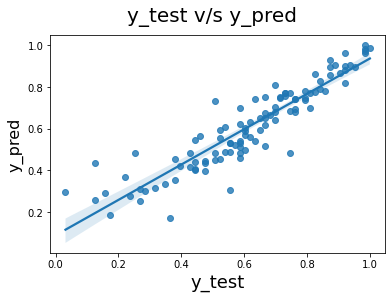

In [75]:
fig = plt.figure() 
sns.regplot(y_test, y_pred)   # linear regression model fit visualisation 
fig.suptitle('y_test v/s y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

**CONCLUSION REPORT**

As per our final Model, the top predictor variables that influences the Chance of Admit are:

- **CGPA:** A coefficient value of ‘0.629041’ indicated that a unit increase in CGPA variable, increases the Chance of Admit  by 62.9041 %.
- **TOEFL Score:** A coefficient value of ‘0.155830’ indicated that a unit increase in tOEFL Score variable, increases the Chance of Admit  by 15.5830 %.
- **GRE Score:** A coefficient value of ‘0.078421’ indicated that a unit increase in GRE Score variable, increases the Chance of Admit  by 7.8421 %.

- **LOR:** A coefficient value of ‘0.113177’ indicated that a unit increase in LOR variable, increases the Chance of Admit  by 11.3177 %.
